In [150]:
import pandas as pd
df = pd.read_csv('train.csv')

In [151]:
def to_days(x):
    month_to_days = {1:0, 2:31, 3:60, 4:91, 5:121, 6:152, 7:182, 8:213, 9:244, 10:274, 11:305, 12:335}
    return month_to_days[x]

In [152]:
df.loc[:, 'Day'] = df['Month'].apply(lambda x: to_days(x))
df['Day'] = df['Day'] + df['Day_of_Month']
df = df.astype({'Day':object})

In [153]:
df1 = df[df['Delay'].notnull()]

In [154]:
df1 = df1.drop(columns=['ID'], axis=1)

In [155]:
df1 = df1.dropna()

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113787 entries, 13 to 999992
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     113787 non-null  int64  
 1   Day_of_Month              113787 non-null  int64  
 2   Estimated_Departure_Time  113787 non-null  float64
 3   Estimated_Arrival_Time    113787 non-null  float64
 4   Cancelled                 113787 non-null  int64  
 5   Diverted                  113787 non-null  int64  
 6   Origin_Airport            113787 non-null  object 
 7   Origin_Airport_ID         113787 non-null  int64  
 8   Origin_State              113787 non-null  object 
 9   Destination_Airport       113787 non-null  object 
 10  Destination_Airport_ID    113787 non-null  int64  
 11  Destination_State         113787 non-null  object 
 12  Distance                  113787 non-null  float64
 13  Airline                   113787 non-null  objec

In [157]:
df1.head()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Day
13,9,19,615.0,706.0,0,0,MAF,13158,Texas,DEN,11292,Colorado,563.0,SkyWest Airlines Inc.,UA,20304.0,N165SY,Not_Delayed,263
19,7,14,1907.0,2145.0,0,0,BDL,10529,Connecticut,ATL,10397,Georgia,859.0,Delta Air Lines Inc.,DL,19790.0,N962DN,Not_Delayed,196
42,10,24,1005.0,1130.0,0,0,ORD,13930,Illinois,STL,15016,Missouri,258.0,Trans States Airlines,UA,20237.0,N835HK,Not_Delayed,298
59,5,2,1732.0,1935.0,0,0,RIC,14524,Virginia,MCO,13204,Florida,667.0,JetBlue Airways,B6,20409.0,N258JB,Not_Delayed,123
63,12,28,1820.0,1925.0,0,0,OAK,13796,California,BUR,10800,California,325.0,Southwest Airlines Co.,WN,19393.0,N777QC,Not_Delayed,363


In [158]:
# 타겟 칼럼값 바꾸기
df1['Delay'] = df1['Delay'].replace({'Delayed': 1, 'Not_Delayed': 0})

In [159]:
# 라벨인코더 - 순서가 중요할 때 사용하면 좋다는데 이건 순서가 없네
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Airline'] = label_encoder.fit_transform(df1['Airline'])
df1['Origin_State'] = label_encoder.fit_transform(df1['Origin_State'])
df1['Destination_State'] = label_encoder.fit_transform(df1['Destination_State'])
df1['Tail_Number'] = label_encoder.fit_transform(df1['Tail_Number'])

In [160]:
features = ['Day', 'Estimated_Departure_Time', 'Estimated_Arrival_Time',
            'Origin_Airport_ID', 'Origin_State', 'Destination_Airport_ID', 'Destination_State', 
            'Distance', 'Carrier_ID(DOT)', 'Tail_Number', 'Airline']
# 
X = df1[features]
y = df1['Delay']

<Axes: >

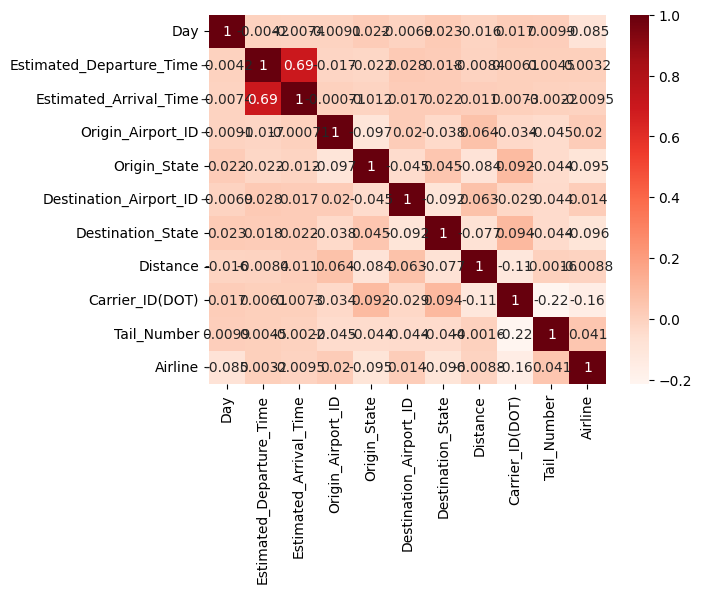

In [161]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True, cmap='Reds')

In [162]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [163]:
X_tn

,Day,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Distance,Carrier_ID(DOT),Tail_Number,Airline
302303,108,1001.0,1155.0,10994,39,14100,36,550.0,20436.0,1384,14
880270,16,1420.0,2133.0,14908,4,10397,8,1919.0,19790.0,3509,9
833576,231,1810.0,2030.0,14122,36,14771,4,2254.0,19977.0,2338,26
943699,247,2140.0,2240.0,14100,36,10434,36,104.0,20427.0,3270,5
892883,151,858.0,1102.0,13930,11,12339,12,177.0,19977.0,4610,26
...,...,...,...,...,...,...,...,...,...,...,...
184788,41,1029.0,1149.0,14679,4,12889,26,258.0,20416.0,3333,24
403404,323,1755.0,2111.0,14107,2,11298,42,868.0,19805.0,5350,3
373540,270,2200.0,701.0,12982,9,14107,2,2979.0,19805.0,812,3
382292,41,2220.0,2323.0,11057,31,14685,8,213.0,20397.0,2915,6


In [164]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [165]:
# 나이브 베이즈 알고리즘
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_tn_std, y_tn)

GaussianNB()

In [166]:
# 예측
pred_gnb = clf_gnb.predict(X_te_std)
print(pred_gnb)

[0 0 0 ... 0 0 0]


In [167]:
# 정확도 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_gnb)
print("accuracy:", accuracy)

# 정밀도 
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_gnb, average='macro')
print("precision:", precision)

# 리콜 
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_gnb, average='macro')
print("recall:", recall)

# F1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_gnb, average='macro')
print("f1:", f1)


accuracy: 0.8253242872710654
precision: 0.484342804876823
recall: 0.4999196927916116
f1: 0.4527496280686934


In [168]:
# 의사결정나무 실습
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_tn_std, y_tn)

DecisionTreeClassifier(random_state=0)

In [169]:
# 예측
pred_tree = clf_tree.predict(X_te_std)
print(pred_tree)

[1 1 0 ... 0 0 0]


In [170]:
# 정확도 
from sklearn.metrics import accuracy_score
accuracy_t = accuracy_score(y_te, pred_tree)
print("accuracy:", accuracy_t)

# 정밀도 
from sklearn.metrics import precision_score
precision_t = precision_score(y_te, pred_tree, average='macro')
print("precision:", precision_t)

# 리콜 
from sklearn.metrics import recall_score
recall_t = recall_score(y_te, pred_tree, average='macro')
print("recall:", recall_t)

# F1 스코어
from sklearn.metrics import f1_score
f1_t = f1_score(y_te, pred_tree, average='macro')
print("f1:", f1_t)


accuracy: 0.7151193447463704
precision: 0.5264609193494595
recall: 0.5289317104068364
f1: 0.5272438489988871


In [171]:
# 선형 회귀분석 학습
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()
clf_lr.fit(X_tn_std, y_tn)

# 릿지 회귀분석(L2 제약식 적용)
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha=0.002)
clf_ridge.fit(X_tn_std, y_tn)

# 라쏘 회귀분석(L1 제약식 적용)
from sklearn.linear_model import Lasso
clf_lasso = Lasso(alpha=0.001)
clf_lasso.fit(X_tn_std, y_tn)

# 엘라스틱 회귀분석(L1 + L2 제약식 적용)
from sklearn.linear_model import ElasticNet
clf_elastic = ElasticNet(alpha=0.01, l1_ratio=0.01)
clf_elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [172]:
pred_lr = clf_lr.predict(X_te_std)
pred_ridge = clf_ridge.predict(X_te_std)
pred_lasso = clf_lasso.predict(X_te_std)
pred_elastic = clf_elastic.predict(X_te_std)

In [173]:
# 모형 평가 - MSE
from sklearn.metrics import mean_squared_error
print("LinearRegression: ", mean_squared_error(y_te, pred_lr))
print("Ridge: ",mean_squared_error(y_te, pred_ridge))
print("Lasso: ",mean_squared_error(y_te, pred_lasso))
print("ElasticNet: ",mean_squared_error(y_te, pred_elastic))
print("DecisionTree: ",mean_squared_error(y_te, pred_tree))
print("GaussinNB: ",mean_squared_error(y_te, pred_gnb))

LinearRegression:  0.14076497558932521
Ridge:  0.14076497558717568
Lasso:  0.14079015575549236
ElasticNet:  0.14076635621138095
DecisionTree:  0.28488065525362954
GaussinNB:  0.1746757127289345
